0.7855


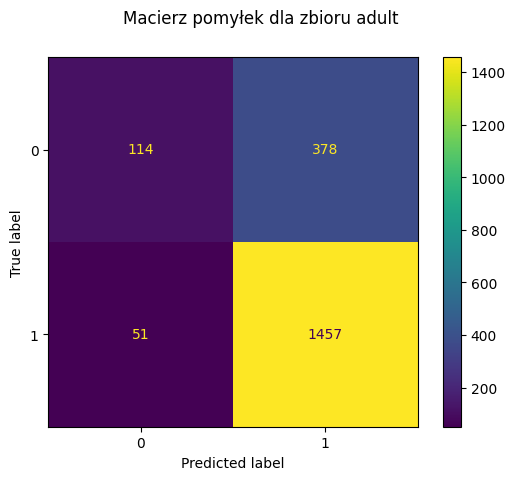

In [81]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from src.models.aq_algorithm import AQClassifier, Rule

df = pd.read_csv("../data/processed/adult.csv").head(10000)
df['y'] = df['y'].map(lambda x: x == ' <=50K')
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), df['y'], test_size=0.2, random_state=21)
clf = AQClassifier.load("../models/aq_adult_70_50_10_15_10", **{
        'star_it': 70,
        'it': 50,
        'max_cpx': 10,
        'max_rules': 15,
        'no_diff_it': 5,
    })
y_pred=clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.suptitle("Macierz pomyłek dla zbioru adult")
plt.savefig(f"../reports/figures/stage-3/adult.eps",format='eps', dpi=300)


In [84]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from src.models.aq_algorithm import AQClassifier, Rule

df = pd.read_csv("../data/processed/bank-full.csv")
df['y'] = df['y'].map(lambda x: x == 'no')
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'), df['y'], test_size=0.2, random_state=2137)
clf = AQClassifier.load("../models/aq_bank_200_50_400_15_10", **{
        'star_it': 200,
        'it': 50,
        'max_cpx': 400,
        'max_rules': 15,
        'no_diff_it': 10,
    })
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.suptitle("Macierz pomyłek dla zbioru bank")
plt.savefig(f"../reports/figures/stage-3/bank.eps",format='eps', dpi=300)

KeyboardInterrupt: 

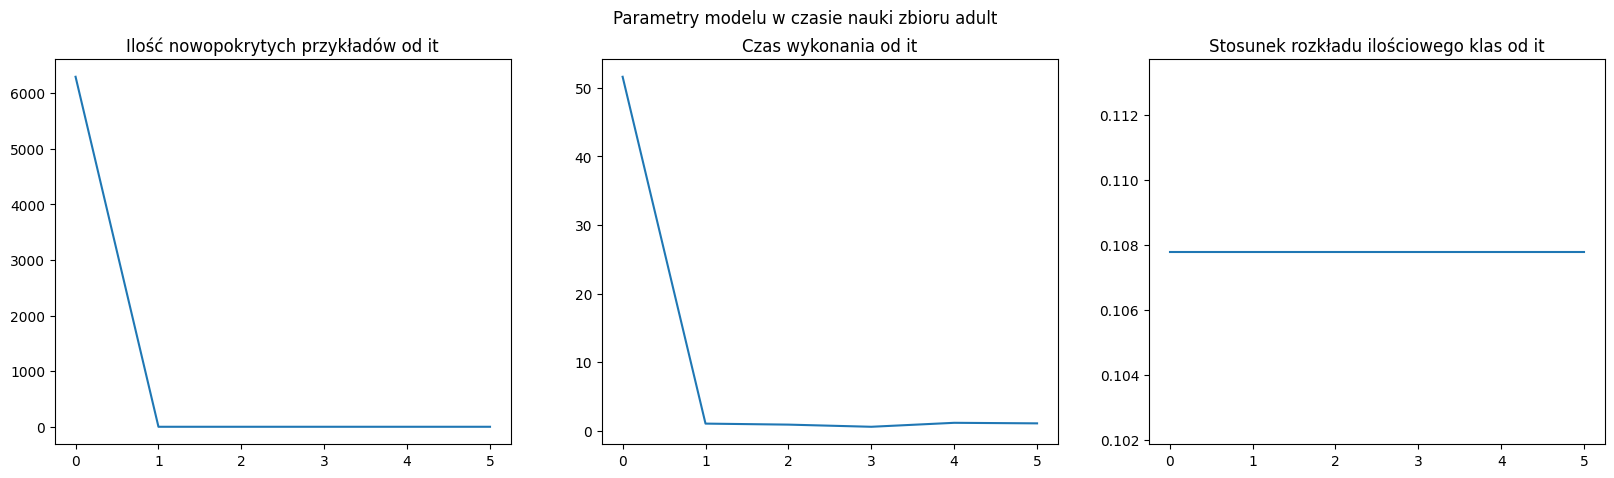

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
df = pd.read_json('../models/aq_adult_50_50_10_15_10_res.json')
fig.suptitle("Parametry modelu w czasie nauki zbioru adult")
axs[0].plot(df['new_covered'])
axs[0].set_title("Ilość nowopokrytych przykładów od it")
axs[1].plot(df['time'])
axs[1].set_title("Czas wykonania od it")
axs[2].plot(df['cls_distrib'])
axs[2].set_title("Stosunek rozkładu ilościowego klas od it")
fig.savefig(f"../reports/figures/stage-3/adult-plots.eps",format='eps', dpi=300)



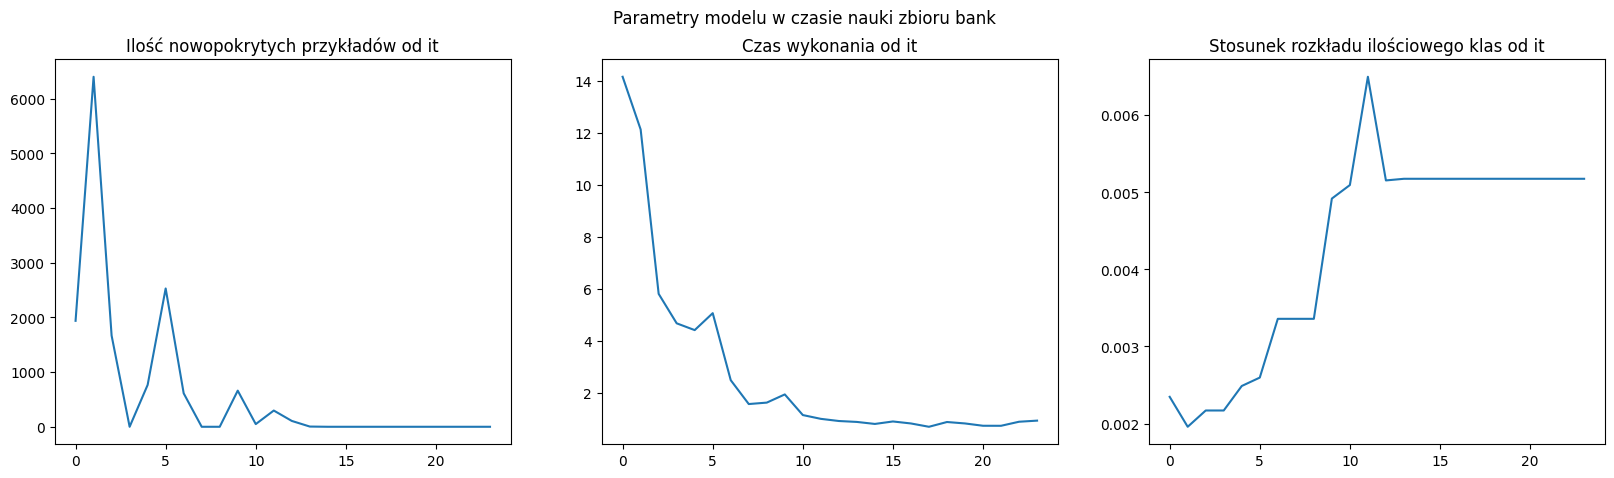

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
df = pd.read_json('../models/aq_bank_50_50_10_15_10_res.json')
fig.suptitle("Parametry modelu w czasie nauki zbioru bank")
axs[0].plot(df['new_covered'])
axs[0].set_title("Ilość nowopokrytych przykładów od it")
axs[1].plot(df['time'])
axs[1].set_title("Czas wykonania od it")
axs[2].plot(df['cls_distrib'])
axs[2].set_title("Stosunek rozkładu ilościowego klas od it")
fig.savefig(f"../reports/figures/stage-3/bank-plots.eps",format='eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


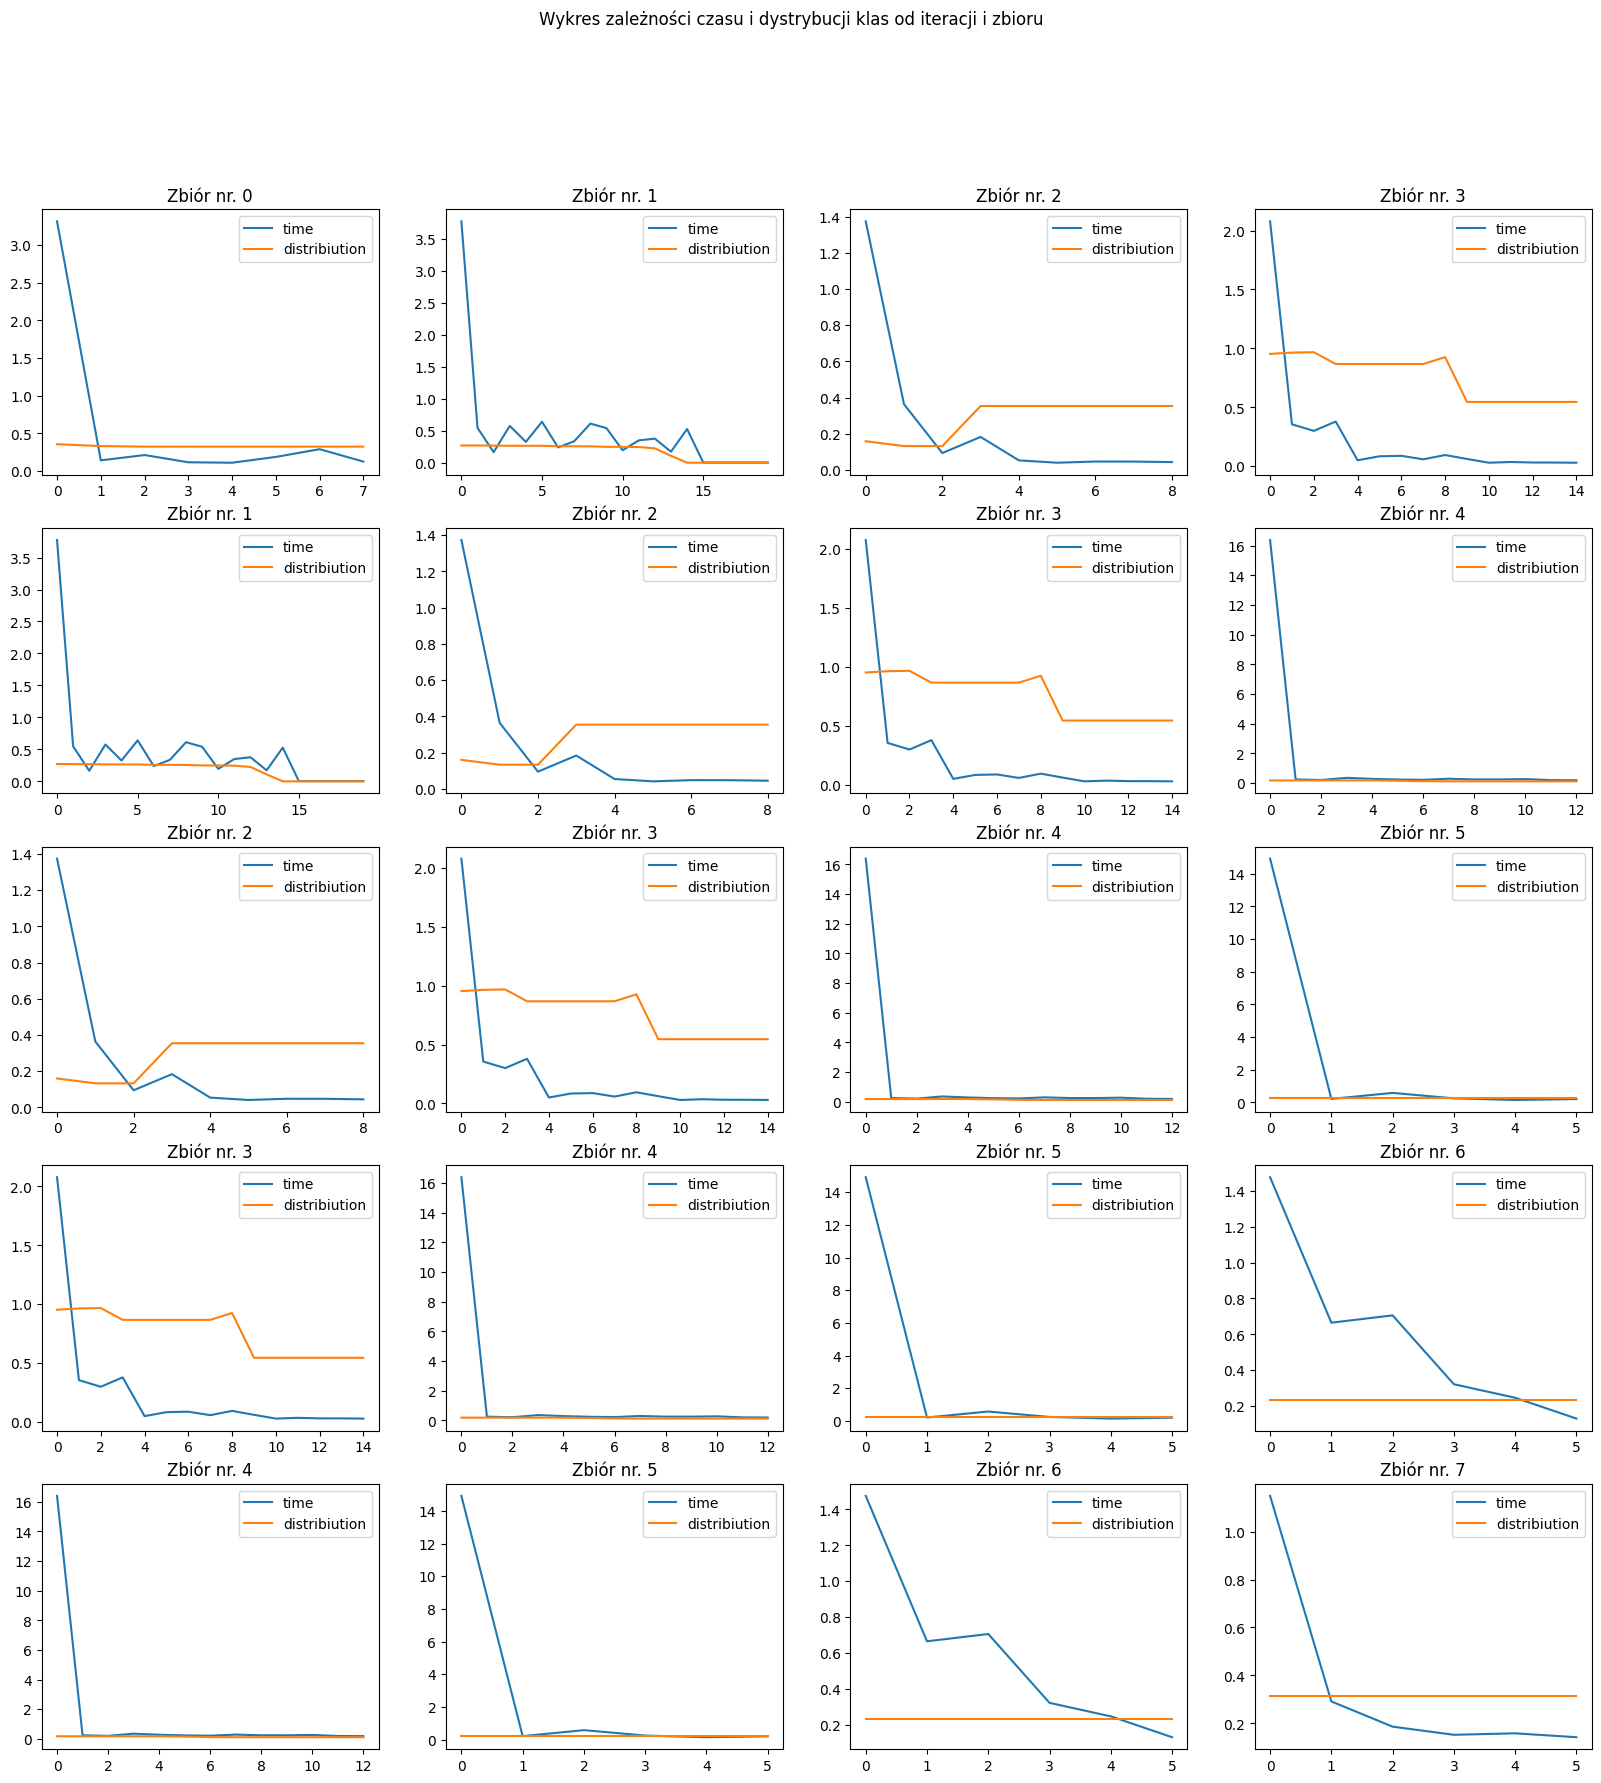

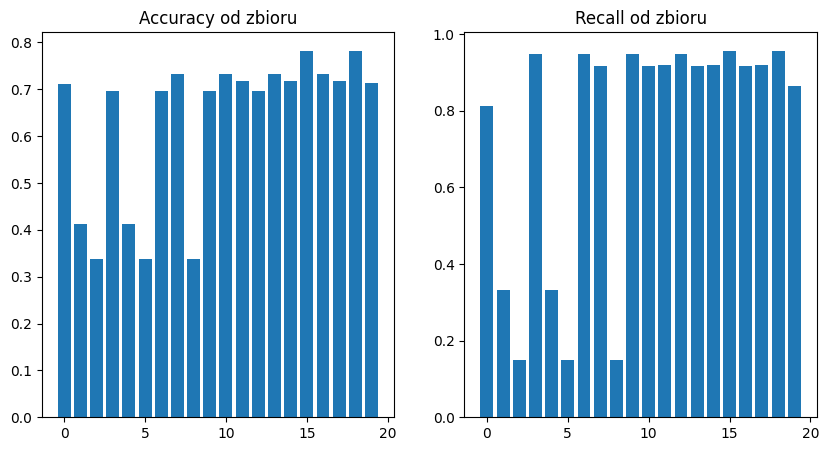

In [60]:
import numpy as np
fig, axs = plt.subplots(5, 4, figsize=(20, 20))
import json
stats = {
        'acc': [],
        'rec': []
}
for i in range(5):
        for j in range(4):
                with open(f'../models/results/res_{i+j}.json', 'r') as fh:
                        data = json.load(fh)
                        stats['acc'].append(data['acc'])
                        stats['rec'].append(data['rec'])
                        axs[i, j].plot(data['time'], label='time')
                        axs[i, j].plot(data['cls_distrib'], label='distribiution')
                        axs[i, j].legend()
                        axs[i, j].set_title(f"Zbiór nr. {i+j}")
fig.suptitle("Wykres zależności czasu i dystrybucji klas od iteracji i zbioru")
fig.savefig(f"../reports/figures/stage-3/adult-plots-kmeans.eps",format='eps', dpi=300)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(range(len(stats['acc'])), stats['acc'])
axs[0].set_title("Accuracy od zbioru")
axs[1].bar(range(len(stats['rec'])), stats['rec'])
axs[1].set_title("Recall od zbioru")
fig.savefig(f"../reports/figures/stage-3/adult-stats.eps",format='eps', dpi=300)
